201812 2018 evaluation vs GRL dataset

In [60]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [61]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [62]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [63]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


In [64]:
##changeable variables


## PSU to reference salinity
SR = (35.16504/35) g kg–1 * S

In [65]:
infil = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_nu.txt')

In [66]:
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]



 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [67]:
len(no3)

860

In [68]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35

In [69]:
S_psu= S_rs*35/35.16504

# DIC, year 2007-17

2007
2007
2007
2007
metrics calculated on FULL DATASET
bias =  -28.53237239958571
RMSE = 72.59157918961972
Willmott = 0.9415419790727573

metrics calculated on JdF data
bias =  -43.992129059074614
RMSE = 68.33219616782047
Willmott = 0.856692045944922

metrics calculated on Haro data
bias =  -36.18980786217571
RMSE = 67.64870660831163
Willmott = 0.8004883866248275

metrics calculated on CS data
bias =  -30.948951572054284
RMSE = 78.07145776816287
Willmott = 0.9466868119287762

metrics calculated on NS data
bias =  -11.350390715293543
RMSE = 70.02303731792587
Willmott = 0.9295154018548297

metrics calculated on JdF data (>1800)
bias =  -43.992129059074614
RMSE = 68.33219616782047
Willmott = 0.856692045944922

metrics calculated on Haro data (>1800)
bias =  -36.18980786217571
RMSE = 67.64870660831163
Willmott = 0.8004883866248275

metrics calculated on CS data (>1800)
bias =  -44.17998359199328
RMSE = 59.035058166208216
Willmott = 0.8857299361879908

metrics calculated on NS data (>1800)


2016
2016
2016
metrics calculated on FULL DATASET
bias =  -4.832543298023211
RMSE = 76.82868259488424
Willmott = 0.9366966019689625

metrics calculated on JdF data
bias =  -8.803896637199614
RMSE = 57.12795161924354
Willmott = 0.9228272356017

metrics calculated on Haro data
bias =  -14.632923096550712
RMSE = 48.53562698500995
Willmott = 0.9096586926645912

metrics calculated on CS data
bias =  -4.517555087679284
RMSE = 88.26810358702237
Willmott = 0.9294157116189088

metrics calculated on NS data
bias =  1.8866698315814574
RMSE = 82.54470016316604
Willmott = 0.9043577391117328

metrics calculated on JdF data (>1800)
bias =  -8.803896637199614
RMSE = 57.12795161924354
Willmott = 0.9228272356017

metrics calculated on Haro data (>1800)
bias =  -14.632923096550712
RMSE = 48.53562698500995
Willmott = 0.9096586926645912

metrics calculated on CS data (>1800)
bias =  -18.536917185743278
RMSE = 50.25577327327856
Willmott = 0.923862213672109

metrics calculated on NS data (>1800)
bias =  -10.

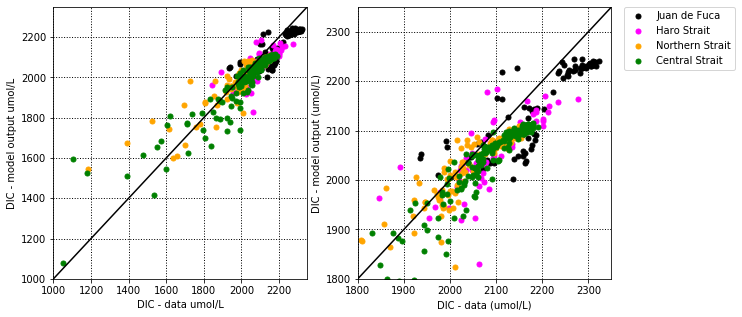

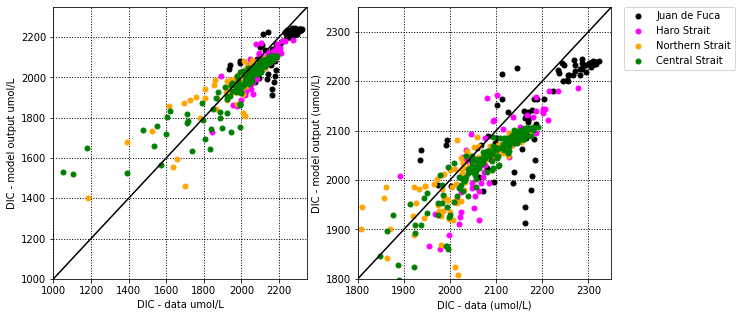

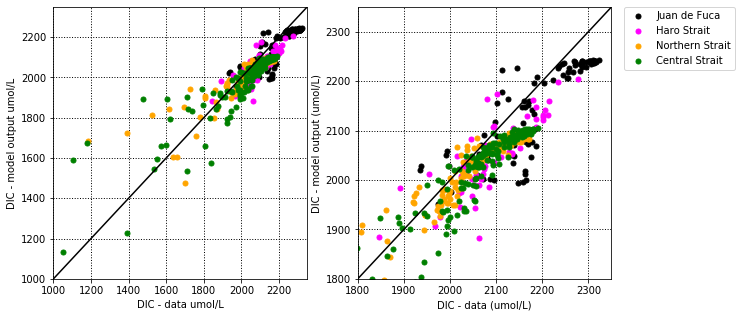

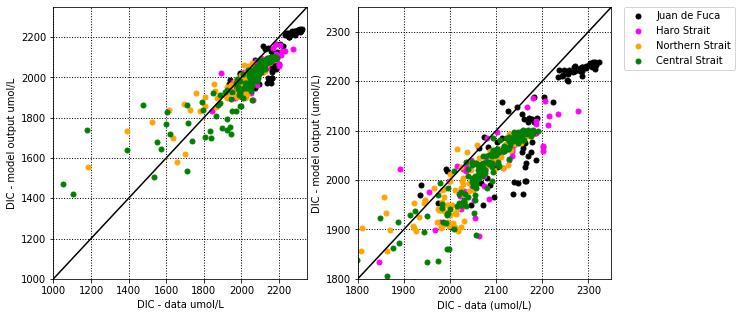

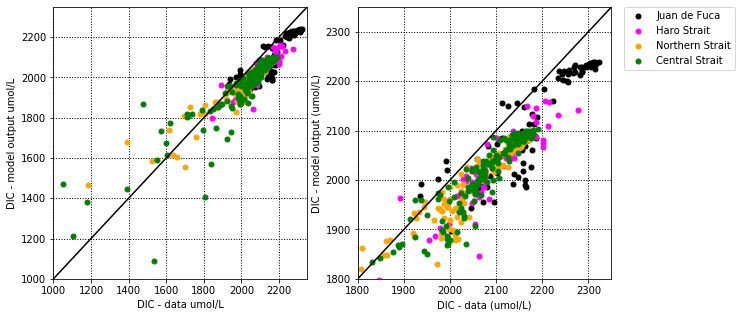

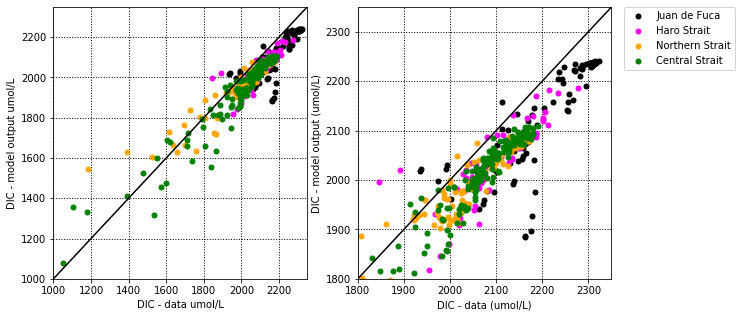

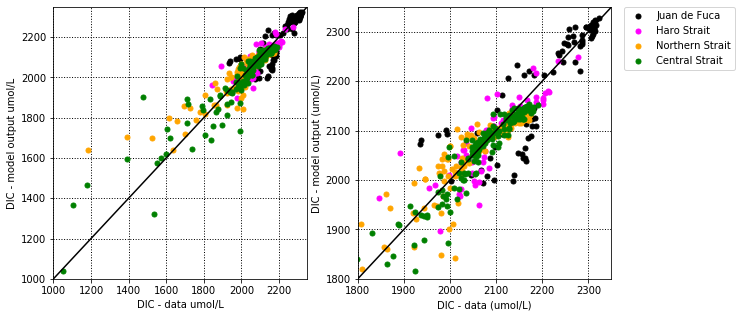

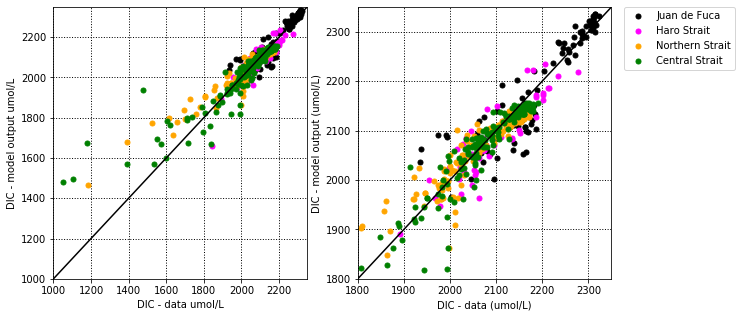

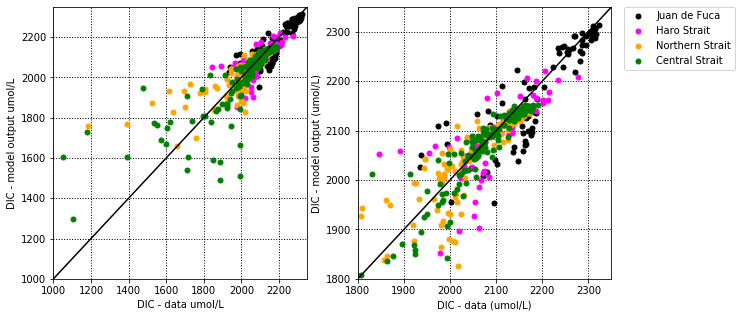

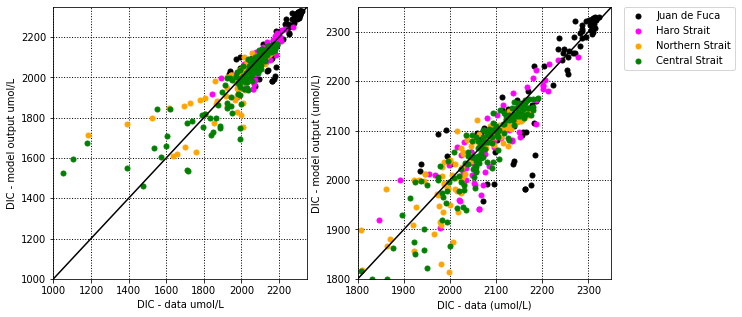

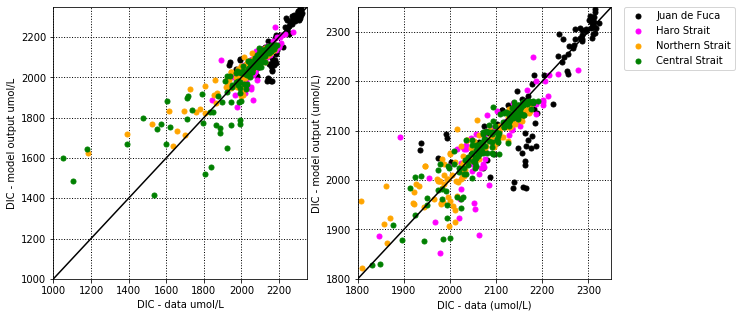

In [71]:
for yr in range(2007,2018):
    print(yr)
    tyr = str(yr)
    scrdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/pyscripts/MODEL_EVAL_scripts/'
    DIC = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_' + str(yr) + '.nc')

    #extractions

    DIC_mod = DIC['model_output']['mod_point'][:]
    is_ref = DIC['model_output']['mod_x'][:]
    js_ref = DIC['model_output']['mod_y'][:]


    #locations 
    loc_tag = np.zeros_like(dic)
    loc_tag[:] = 4

    for w in range(0,len(loc_tag)):
        x = is_ref[w]
        y = js_ref[w]
        #jdf is 1
        if  (x <200) & (y>220) & (y<500) :
            loc_tag[w] = 1
            #n strait
        if  (y >= 550):
            loc_tag[w] = 2
            #central strait
        if (x> 150) & (y>380) & (y<550):
            loc_tag[w] = 3
            #4 is haro/puget
        if ((x>150) & (y>320) & (y<370)):
            loc_tag[w] =4

    DIC_mod[DIC_mod==0]=np.nan

    #DIC
    dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
    dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
    dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
    dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

    dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
    DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

    #plot

    fig = plt.figure(figsize=(10,5))

    for i in range(1,3):
        if i == 1:
            ax = fig.add_subplot(1,2,i)
            ax.grid(color='k', linestyle=':', linewidth=1)
            ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5)
            ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
            ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5)
            ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5)
            #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

            ax.set_xlabel('DIC - data umol/L')
            ax.set_ylabel('DIC - model output umol/L')
            ax.set_xlim(1000,2350)
            ax.set_ylim(1000,2350)
            ax.plot([1000,2350],[1000,2350],'k')

        if i == 2:
            ax = fig.add_subplot(1,2,i)
            ax.grid(color='k', linestyle=':', linewidth=1)
            ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5, label = 'Juan de Fuca')
            ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5, label = 'Haro Strait')
            ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5, label = 'Northern Strait')
            ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5, label = 'Central Strait')
            #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

            ax.set_xlabel('DIC - data (umol/L)')
            ax.set_ylabel('DIC - model output (umol/L)')
            #ax.legend( ['Juan de Fuca','Haro Strait','Northern Strait','Central Strait'],loc='best', fontsize = 20)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            ax.set_xlim(1800,2350)
            ax.set_ylim(1800,2350)
            ax.plot([1800,2400],[1800,2400],'k')

    obs =dic_compbl
    mod = DIC_mod_compbl
    print(tyr)
    print(tyr)
    print(tyr)
    print('metrics calculated on FULL DATASET')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))


    obs =dic_jdf
    mod = dic_MODjdf
    print()
    print('metrics calculated on JdF data')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_haro
    mod = dic_MODharo
    print()
    print('metrics calculated on Haro data')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_cs
    mod = dic_MODcs
    print()
    print('metrics calculated on CS data')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_ns
    mod = dic_MODns
    print()
    print('metrics calculated on NS data')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_jdf[dic_jdf>1800]
    mod = dic_MODjdf[dic_jdf>1800]
    print()
    print('metrics calculated on JdF data (>1800)')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_haro[dic_haro>1800]
    mod = dic_MODharo[dic_haro>1800]
    print()
    print('metrics calculated on Haro data (>1800)')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_cs[dic_cs>1800]
    mod = dic_MODcs[dic_cs>1800]
    print()
    print('metrics calculated on CS data (>1800)')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))

    obs =dic_ns[dic_ns>1800]
    mod = dic_MODns[dic_ns>1800]
    print()
    print('metrics calculated on NS data (>1800)')
    print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
    print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                                  len(obs))))
    xbar = np.mean(obs)
    print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                                 np.sum((np.abs(mod - xbar) 
                                         + np.abs(obs - xbar))**2))))


In [ ]:
for yr in range(2007,2018):
    print(yr)
    print(str(yr))

In [72]:
bias = [-28.53237239958571,-31.86953060271071,-28.95449154021071,-44.04763118864821,-55.88893978239821,-58.03920833708571,-0.00856868864821081,5.720679358226789,0.5026617801017892,-4.832543298023211,1.0453863894767892]

rmse=[72.59157918961972,82.01239206123364,81.42339449411723,88.16071910287648,87.1825963770019,81.64996965840525,62.92258394906781,64.38626281214731,89.47227188600466,76.82868259488424,78.32051951819562]
wss=[0.9415419790727573,0.9216975505082037,0.9241781797910679,0.9081795187907317,0.921912431023568,0.934791180712127,0.9589033965551771,0.9535478619541616,0.9081121717243401,0.9366966019689625,0.9306911578086389]

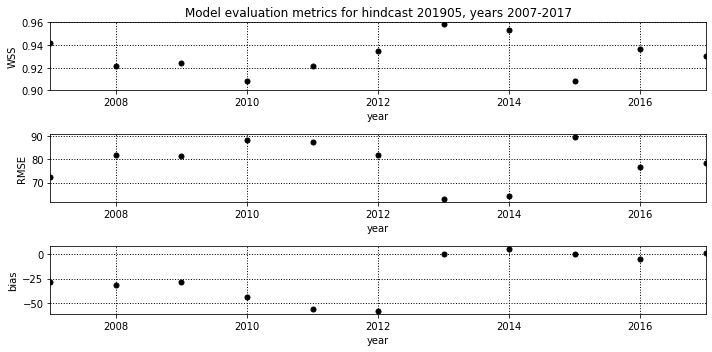

In [86]:
yrs = np.arange(2007,2018,1)

fig = plt.figure(figsize=(10,5))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs,wss,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('WSS')
        ax.set_xlim(2007,2017)
        ax.set_ylim(0.9,0.96)
        ax.set_title('Model evaluation metrics for hindcast 201905, years 2007-2017')


    if i == 2:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs,rmse,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('RMSE')
        ax.set_xlim(2007,2017)
        #ax.set_ylim(0.9,0.96)

    if i == 3:
        ax = fig.add_subplot(3,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs, bias,'ko',markersize=5)

        ax.set_xlabel('year')
        ax.set_ylabel('bias')
        ax.set_xlim(2007,2017)
        #ax.set_ylim(0.9,0.96)

plt.tight_layout()        
